   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

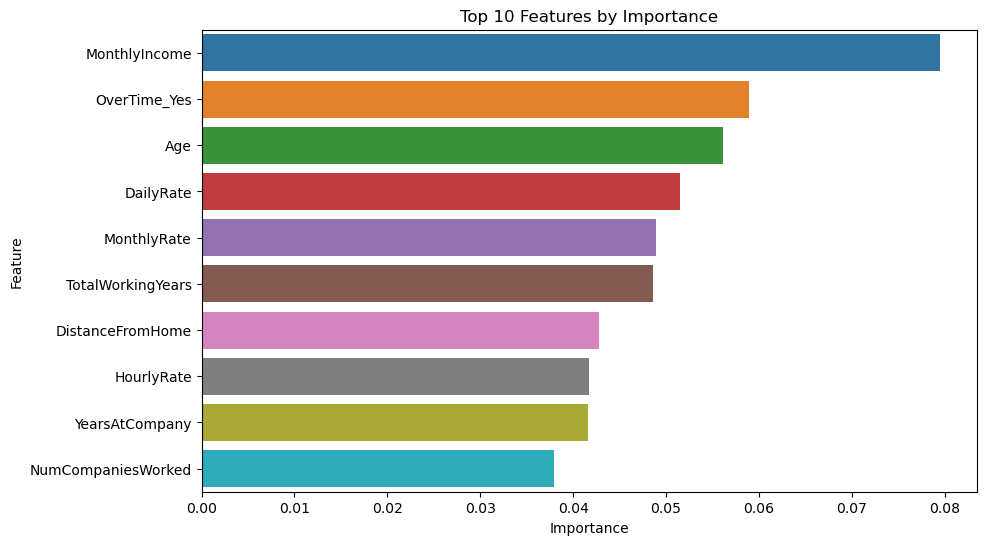

In [2]:
import pandas as pd
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the zip file to take the data
zip_file_path = r'C:\Users\Zaina\Downloads\ibm-hr-analytics-employee-attrition-performance.zip'

# Extract the CSV file from the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    csv_file_name = zip_ref.namelist()[0]  # The CSV file is the first file in the zip
    zip_ref.extract(csv_file_name)

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_file_name)

# Display the first few rows of the DataFrame
print(data.head())

# Drop unnecessary columns if they exist
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
data = data.drop(columns_to_drop, axis=1)

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split features and target variable
X = data.drop('Attrition_Yes', axis=1)
y = data['Attrition_Yes']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

# Evaluate Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Feature importance analysis
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance.head(10))
plt.title('Top 10 Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Analysis Summary:
After conducting an analysis on employee attrition within the organization, several key factors contributing to employees leaving the organization have been identified:

Lack of Overtime: Surprisingly, employees who do not have overtime are more likely to leave the organization. This may indicate that these employees either seek higher income opportunities or feel underutilized in their current roles.

Monthly Income: As anticipated, monthly income is a significant factor influencing employees to leave in search of better salary prospects.

Age: It's expected that employees nearing retirement age may choose to leave the organization.